In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [37]:
folder_path = r"C:\Users\mp_ma\OneDrive - polymtlus\Desktop\POST_DOC\Project\plca_metals_github\plca_metals"  # Change this to the actual path

# Lists of minerals covered in the IEA scenarios and USGS MCS2024

In [38]:
# List of metals included in the IEA scenarios
etm_iea = [
    "aluminum",
    "arsenic",
    "boron",
    "cadmium",
    "chromium",
    "cobalt",
    "copper",
    "dysprosium",
    "ferromanganese",
    "ferronickel",
    "gallium",
    "graphite",
    "indium",
    "iridium",
    "lead",
    "lithium",
    "manganese",
    "molybdenum",
    "neodymium",
    "nickel",
    "platinum",
    "praseodymium",
    "selenium",
    "silicon",
    "silver",
    "tellurium",
    "terbium",
    "tin",
    "vanadium",
    "zinc",
    "zirconium"
]

In [39]:
# List of minerals included in the World Mining Data 2024
wmd_2024 = [
    "aluminium",
    "antimony",
    "arsenic",
    "asbestos",
    "baryte",
    "bauxite",
    "bentonite",
    "beryllium",
    "bismuth",
    "boron",
    "cadmium",
    "chromium",
    "coal (tot)",
    "cobalt",
    "coking coal",
    "copper",
    "diam. (gem)",
    "diam. (ind)",
    "diatomite",
    "feldspar",
    "fluorspar",
    "gallium",
    "germanium",
    "gold",
    "graphite",
    "gypsum",
    "hard coal (tot)",
    "indium",
    "iron",
    "kaolin",
    "lead",
    "lignite",
    "lithium",
    "magnesite",
    "manganese",
    "mercury",
    "molybdenum",
    "nat. gas",
    "nickel",
    "niobium",
    "oil sands*",
    "oil shales",
    "palladium",
    "perlite",
    "petroleum",
    "phosphates",
    "platinum",
    "potash",
    "rare earths",
    "rhenium",
    "rhodium",
    "salt",
    "selenium",
    "silver",
    "steam coal",
    "sulfur",
    "talc",
    "tantalum",
    "tellurium",
    "tin",
    "titanium",
    "tungsten",
    "uranium",
    "vanadium",
    "vermiculite",
    "zinc",
    "zircon"
]


In [40]:
# List of minerals included in the USGS Mineral Commodities 2024
usgs_minerals_2024 = [
    "abrasives", "fluorspar", "mercury", "silicon",
    "aluminum", "gallium", "mica", "silver",
    "antimony", "garnet", "molybdenum", "soda ash",
    "arsenic", "gemstones", "nickel", "stone",
    "asbestos", "germanium", "niobium", "strontium",
    "barite", "gold", "nitrogen", "sulfur",
    "bauxite", "graphite", "palladium", "talc",
    "beryllium", "gypsum", "peat", "tantalum",
    "bismuth", "hafnium", "perlite", "tellurium",
    "boron", "helium", "phosphate rock", "thallium",
    "bromine", "indium", "platinum", "thorium",
    "cadmium", "iodine", "potash", "tin",
    "cement", "iron and steel", "pumice", "titanium",
    "cesium", "iron ore", "quartz", "tungsten",
    "chromium", "iron oxide pigments", "rare earths", "vanadium",
    "clays", "kyanite", "rhenium", "vermiculite",
    "cobalt", "lead", "rubidium", "wollastonite",
    "copper", "lime", "salt", "yttrium",
    "diamond", "lithium", "sand and gravel", "zeolites",
    "diatomite", "magnesium", "scandium", "zinc",
    "feldspar", "manganese", "selenium", "zirconium"
]


In [41]:
csv_to_usgs_dict = {
    "mcs2024-abras_world.csv": "abrasives",
    "mcs2024-alumi_world.csv": "aluminum",
    "mcs2024-antim_world.csv": "antimony",
    "mcs2024-arsen_world.csv": "arsenic",
    "mcs2024-asbes_world.csv": "asbestos",
    "mcs2024-barit_world.csv": "barite",
    "mcs2024-bauxi_world.csv": "bauxite",
    "mcs2024-beryl_world.csv": "beryllium",
    "MCS2024-bismu_world.csv": "bismuth",
    "mcs2024-boron_world.csv": "boron",
    "mcs2024-bromi_world.csv": "bromine",
    "mcs2024-cadmi_world.csv": "cadmium",
    "mcs2024-cemen_world.csv": "cement",
    "mcs2024-chrom_world.csv": "chromium",
    "mcs2024-clays_world.csv": "clays",
    "mcs2024-cobal_world.csv": "cobalt",
    "mcs2024-coppe_world.csv": "copper",
    "mcs2024-diamo_world.csv": "diamond",
    "mcs2024-diato_world.csv": "diatomite",
    "mcs2024-felds_world.csv": "feldspar",
    "mcs2024-feore_world.csv": "iron ore",
    "mcs2024-fepig_world.csv": "iron oxide pigments",
    "mcs2024-feste_world.csv": "iron and steel",
    "mcs2024-fluor_world.csv": "fluorspar",
    "mcs2024-galli_world.csv": "gallium",
    "mcs2024-garne_world.csv": "garnet",
    "mcs2024-gemst_world.csv": "gemstones",
    "mcs2024-germa_world.csv": "germanium",
    "mcs2024-gold_world.csv": "gold",
    "mcs2024-graph_world.csv": "graphite",
    "mcs2024-gypsu_world.csv": "gypsum",
    "mcs2024-heliu_world.csv": "helium",
    "mcs2024-indiu_world.csv": "indium",
    "mcs2024-iodin_world.csv": "iodine",
    "mcs2024-kyani_world.csv": "kyanite",
    "mcs2024-lead_world.csv": "lead",
    "mcs2024-lime_world.csv": "lime",
    "mcs2024-lithi_world.csv": "lithium",
    "mcs2024-manga_world.csv": "manganese",
    "mcs2024-mercu_world.csv": "mercury",
    "mcs2024-mgcomp_world.csv": "magnesium",
    "mcs2024-mgmet_world.csv": "magnesium metal",
    "mcs2024-mica_world.csv": "mica",
    "mcs2024-molyb_world.csv": "molybdenum",
    "mcs2024-nicke_world.csv": "nickel",
    "mcs2024-niobi_world.csv": "niobium",
    "mcs2024-nitro_world.csv": "nitrogen",
    "mcs2024-peat_world.csv": "peat",
    "mcs2024-perli_world.csv": "perlite",
    "mcs2024-phosp_world.csv": "phosphate rock",
    "mcs2024-plati_world.csv": "platinum",
    "mcs2024-potas_world.csv": "potash",
    "mcs2024-raree_world.csv": "rare earths",
    "mcs2024-rheni_world.csv": "rhenium",
    "mcs2024-salt_world.csv": "salt",
    "mcs2024-sandi_world.csv": "sand and gravel",
    "mcs2024-selen_world.csv": "selenium",
    "mcs2024-silve_world.csv": "silver",
    "mcs2024-simet_world.csv": "silicon",
    "mcs2024-sodaa_world.csv": "soda ash",
    "mcs2024-stond_world.csv": "stone",
    "mcs2024-stron_world.csv": "strontium",
    "mcs2024-sulfu_world.csv": "sulfur",
    "mcs2024-talc_world.csv": "talc",
    "mcs2024-tanta_world.csv": "tantalum",
    "mcs2024-tellu_world.csv": "tellurium",
    "mcs2024-timin_world.csv": "tin",
    "mcs2024-tin_world.csv": "tin",
    "mcs2024-titan_world.csv": "titanium",
    "mcs2024-tungs_world.csv": "tungsten",
    "mcs2024-vanad_world.csv": "vanadium",
    "mcs2024-vermi_world.csv": "vermiculite",
    "mcs2024-wolla_world.csv": "wollastonite",
    "mcs2024-zeoli_world.csv": "zeolites",
    "mcs2024-zinc_world.csv": "zinc",
    "mcs2024-zirco_world.csv": "zirconium"
}

In [42]:
unique_minerals = sorted(set(etm_iea + usgs_minerals_2024))

df = pd.DataFrame(unique_minerals, columns=["Mineral"])
df["In_IEA"] = df["Mineral"].isin(etm_iea)
df["In_USGS_MCS2024"] = df["Mineral"].isin(usgs_minerals_2024)
df["In_WMD_2024"] = df["Mineral"].isin(usgs_minerals_2024)

In [43]:
df

,Mineral,In_IEA,In_USGS_MCS2024,In_WMD_2024
0,abrasives,False,True,True
1,aluminum,True,True,True
2,antimony,False,True,True
3,arsenic,True,True,True
4,asbestos,False,True,True
...,...,...,...,...
86,wollastonite,False,True,True
87,yttrium,False,True,True
88,zeolites,False,True,True
89,zinc,True,True,True


In [44]:
df.to_csv(r'data/data_minerals/iea_usgs_wmd_data_availability.csv', index=False)

In [45]:
# Filter for minerals that are in IEA but not in USGS
iea_only_minerals = df[(df["In_IEA"] == True) & (df["In_USGS_MCS2024"] == False) | (df["In_WMD_2024"] == False)]
iea_only_minerals

,Mineral,In_IEA,In_USGS_MCS2024,In_WMD_2024
20,dysprosium,True,False,False
22,ferromanganese,True,False,False
23,ferronickel,True,False,False
36,iridium,True,False,False
49,neodymium,True,False,False
59,praseodymium,True,False,False
78,terbium,True,False,False


# Extract USGS csv data and tranform it to a df  

In [64]:
def extract_world_rows(folder_path):
    all_dfs = []
    
    # Loop through all files in the folder
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):  # Process only CSV files
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            
            
            # Check if required columns exist
            required_columns = {'Source', 'Country'}
            if not required_columns.issubset(df.columns) or len(df.columns) < 4:
                continue  # Skip files missing essential columns
            
            world_df = df[df['Country'].str.contains("World", na=False, case=False)].copy()
            
            # Extract column names for production values
            production_2022_col = df.columns[3]
            production_2023_col = df.columns[4] if len(df.columns) > 4 else None
            
            # Rename columns to standard format
            world_df.rename(columns={
                production_2022_col: 'Production_2022',
                production_2023_col: 'Production_2023'
            }, inplace=True)
            
            # Add unit column
            world_df['Unit'] = production_2022_col.replace("Prod_", "").replace("Cap_", "")
            
            # Add source file column
            world_df['Source_File'] = file
            
            # Ensure 'Type' column exists, fill missing with 'Unknown'
            if 'Type' not in world_df.columns:
                world_df['Type'] = 'Unknown'
            
            # Keep only required columns
            keep_columns = ['Source', 'Country', 'Type', 'Production_2022', 'Production_2023', 'Unit', 'Source_File']
            world_df = world_df[keep_columns]
            
            # Append to list
            all_dfs.append(world_df)
    
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(all_dfs, ignore_index=True) if all_dfs else pd.DataFrame()
    
    combined_df["Mineral"] = combined_df["Source_File"].map(csv_to_usgs_dict)
    combined_df.drop(columns=["Source_File"], inplace=True)

    return combined_df

In [65]:
df_usgs_world = extract_world_rows(folder_path=folder_path + r'\data\data_minerals\USGS\world')
df_usgs_world

,Source,Country,Type,Production_2022,Production_2023,Unit,Mineral
0,MCS2024,World total (rounded),"Plant capacity, fused aluminum oxide",1310000,1300000,t_est_2022,abrasives
1,MCS2024,World total (rounded),"Plant capacity, silicon carbide",1000000,1000000,t_est_2022,abrasives
2,MCS 2024,World total (rounded),"Smelter production, aluminum",68400.0,70000.0,kt_2022,aluminum
3,MCS2024,World total (rounded)10,"Mine production, contained antimony",83100,83000,t_2022,antimony
4,MCS2024,World total (rounded),"Plant production, arsenic trioxide or calculat...",60100.0,60000.0,t_2022,arsenic
...,...,...,...,...,...,...,...
86,MCS2024,World total (rounded),Mine production,516,500,kt_2022,vermiculite
87,MCS2024,World total (rounded),"Mine production, wollastonite",1120000,1100000,t_est_2022,wollastonite
88,NaN,World total (rounded),"Mine production, zeolites",900000.0,1100000.0,t_est_2022,zeolites
89,MCS2024,World total (rounded),"Mine production, zinc content of concentrates ...",12500,12000,kt_2022,zinc


In [48]:
df_iea_usgs = df_usgs_world[df_usgs_world["Mineral"].isin(etm_iea)]
df_iea_usgs

,Source,Country,Type,Production_2022,Production_2023,Unit,Mineral
2,MCS 2024,World total (rounded),"Smelter production, aluminum",68400.0,70000.0,kt_2022,aluminum
4,MCS2024,World total (rounded),"Plant production, arsenic trioxide or calculat...",60100.0,60000.0,t_2022,arsenic
11,MCS2024,World total,boron total all types,XX,XX,kt_2022,boron
13,MCS2024,World total (rounded),Refinery production,22600.0,23000.0,t_2022,cadmium
16,MCS2024,World total (rounded),"Mne production, grosss weight, marketable chro...",41900,41000,kt_2022,chromium
20,MCS2024,World total (rounded),"Mine production, metric tons of contained cobalt",197000,230000,t_est_2022,cobalt
21,MCS2024,World total (rounded),"Mine production, recoverable copper content",21900.0,22000.0,kt_2022,copper
22,MCS2024,World total (rounded),"Refinery production, copper",25900.0,27000.0,kt_2022,copper
32,MCS2024,World total (rounded),Primary production,610000.0,610000.0,kg_2022,gallium
37,MCS2024,World total (rounded),"Mine production, graphite",1680000,1600000,t_2022,graphite


In [49]:
# Function to convert production values to tonnes
def convert_to_tonnes(value, unit):
    try:
        value = float(value)
        if "kt" in unit:  # Kilotonnes to tonnes
            return value * 1_000
        elif "kg" in unit:  # Kilograms to tonnes
            return value / 1_000
        elif "t" in unit:  # Already in tonnes
            return value
        else:
            return None  # Unknown unit
    except ValueError:
        return None  # Handle non-numeric values (e.g., "XX", "n/a")

# Normalize unit column by removing "_2022", "_2023", "_est" etc.
df_iea_usgs["Unit"] = df_iea_usgs["Unit"].str.replace(r'_\d{4}|_est', '', regex=True)

# Convert Production columns to tonnes
for col in ["Production_2022", "Production_2023"]:
    df_iea_usgs[col] = df_iea_usgs.apply(lambda row: convert_to_tonnes(row[col], row["Unit"]), axis=1)

# Drop the now redundant "Unit" column
#df_iea_usgs.drop(columns=["Unit"], inplace=True)
df_iea_usgs['Unit'] = 'tons'
df_iea_usgs

C:\Users\mp_ma\AppData\Local\Temp\ipykernel_16732\2347261534.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iea_usgs["Unit"] = df_iea_usgs["Unit"].str.replace(r'_\d{4}|_est', '', regex=True)
C:\Users\mp_ma\AppData\Local\Temp\ipykernel_16732\2347261534.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iea_usgs[col] = df_iea_usgs.apply(lambda row: convert_to_tonnes(row[col], row["Unit"]), axis=1)
C:\Users\mp_ma\AppData\Local\Temp\ipykernel_16732\2347261534.py:25: SettingWithCopyWarning: 
A valu

,Source,Country,Type,Production_2022,Production_2023,Unit,Mineral
2,MCS 2024,World total (rounded),"Smelter production, aluminum",68400000.0,70000000.0,tons,aluminum
4,MCS2024,World total (rounded),"Plant production, arsenic trioxide or calculat...",60100.0,60000.0,tons,arsenic
11,MCS2024,World total,boron total all types,NaN,NaN,tons,boron
13,MCS2024,World total (rounded),Refinery production,22600.0,23000.0,tons,cadmium
16,MCS2024,World total (rounded),"Mne production, grosss weight, marketable chro...",41900000.0,41000000.0,tons,chromium
20,MCS2024,World total (rounded),"Mine production, metric tons of contained cobalt",197000.0,230000.0,tons,cobalt
21,MCS2024,World total (rounded),"Mine production, recoverable copper content",21900000.0,22000000.0,tons,copper
22,MCS2024,World total (rounded),"Refinery production, copper",25900000.0,27000000.0,tons,copper
32,MCS2024,World total (rounded),Primary production,610.0,610.0,tons,gallium
37,MCS2024,World total (rounded),"Mine production, graphite",1680000.0,1600000.0,tons,graphite


- Production values are not always the same: smelter (ex=aluminum), refinery (ex=indium), 
- No value for boron
- In platinum, values for palladium and platinum
- Two values for silicon (silicon content of ferrosilicon vs silicon metal)
- Four values for tin

In [52]:
df_iea_usgs.to_csv(r'data/data_minerals/USGS/df_iea_usgs.csv', index=False)

# Extract WMD data

In [53]:
df_wmd_2024 = pd.read_excel(folder_path + r'/data/data_minerals/WMD/6.2. World_Production_of_Mineral_Raw_Materials_by_ Mineral_Raw_Materials.xlsx', sheet_name='ALL')
df_wmd_2024["Commodity"] = df_wmd_2024["Commodity"].str.lower()
df_wmd_2024["Commodity"] = df_wmd_2024["Commodity"].replace({"aluminium": "aluminum"})
df_wmd_2024

,Commodity,Commodity_group,Unit,2018,2019,2020,2021,2022
0,aluminum,Non-Ferrous Metals,tons,64443051,63230201,65404146,67049920,68825618
1,antimony,Non-Ferrous Metals,tons,145002,134659,119911,91920,83031
2,arsenic,Non-Ferrous Metals,tons,51737,55243,52298,54695,56404
3,asbestos,Industrial Minerals,tons,1237256,1137505,1132268,1302356,1258065
4,baryte,Industrial Minerals,tons,9627288,9510043,7841612,8358423,8278342
...,...,...,...,...,...,...,...,...
62,uranium,Minerals Fuels,tons,64083,64278,55718,55981,55972
63,vanadium,Iron & Ferro-Alloy Metals,tons,84947,98723,105776,110269,115271
64,vermiculite,Industrial Minerals,tons,438951,424421,416638,456936,502825
65,zinc,Non-Ferrous Metals,tons,12252248,12988998,12669413,12843283,12762076


In [54]:
df_iea_wmd = df_wmd_2024[df_wmd_2024["Commodity"].isin(etm_iea)]
df_iea_wmd

,Commodity,Commodity_group,Unit,2018,2019,2020,2021,2022
0,aluminum,Non-Ferrous Metals,tons,64443051,63230201,65404146,67049920,68825618
2,arsenic,Non-Ferrous Metals,tons,51737,55243,52298,54695,56404
9,boron,Industrial Minerals,tons,4492429,4293276,3601490,4922770,5346091
10,cadmium,Non-Ferrous Metals,tons,27173,25089,25564,25529,23003
11,chromium,Iron & Ferro-Alloy Metals,tons,15188744,15779216,11969552,14721408,15259786
13,cobalt,Iron & Ferro-Alloy Metals,tons,158317,124425,129651,134692,166030
15,copper,Non-Ferrous Metals,tons,20675762,20633412,21074917,21447064,22225410
21,gallium,Non-Ferrous Metals,tons,323,374,304,431,616
24,graphite,Industrial Minerals,tons,1562542,1605838,1388356,1662844,1727486
27,indium,Non-Ferrous Metals,tons,831,918,943,916,1008


In [55]:
df_iea_wmd.to_csv(r'data/data_minerals/WMD/df_iea_wmd.csv', index=False)

# Compare between USGS and WMD

In [67]:
df_usgs_2022 = df_iea_usgs.copy()
df_wmd_2022 = df_iea_wmd.copy()

In [68]:
# Extract relevant columns from both datasets
df_usgs_2022 = df_usgs_2022[['Mineral', 'Production_2022']].rename(columns={'Production_2022': 'USGS_2022'})
df_wmd_2022 = df_wmd_2022[['Commodity', '2022']].rename(columns={'Commodity': 'Mineral', '2022': 'WMD_2022'})

# Merge data on Mineral names
df_comparison = pd.merge(df_usgs_2022, df_wmd_2022, on="Mineral", how="inner")

# Drop rows with NaN values
#df_comparison.dropna(inplace=True)
df_comparison
# Calculate the percentage difference between USGS and WMD values
df_comparison["% Difference"] = ((df_comparison["USGS_2022"] - df_comparison["WMD_2022"]) / df_comparison["WMD_2022"]) * 100
df_comparison

,Mineral,USGS_2022,WMD_2022,% Difference
0,aluminum,68400000.0,68825618,-0.618401
1,arsenic,60100.0,56404,6.552727
2,boron,NaN,5346091,NaN
3,cadmium,22600.0,23003,-1.751945
4,chromium,41900000.0,15259786,174.577900
5,cobalt,197000.0,166030,18.653255
6,copper,21900000.0,22225410,-1.464135
7,copper,25900000.0,22225410,16.533283
8,gallium,610.0,616,-0.974026
9,graphite,1680000.0,1727486,-2.748850


<Figure size 1200x600 with 0 Axes>

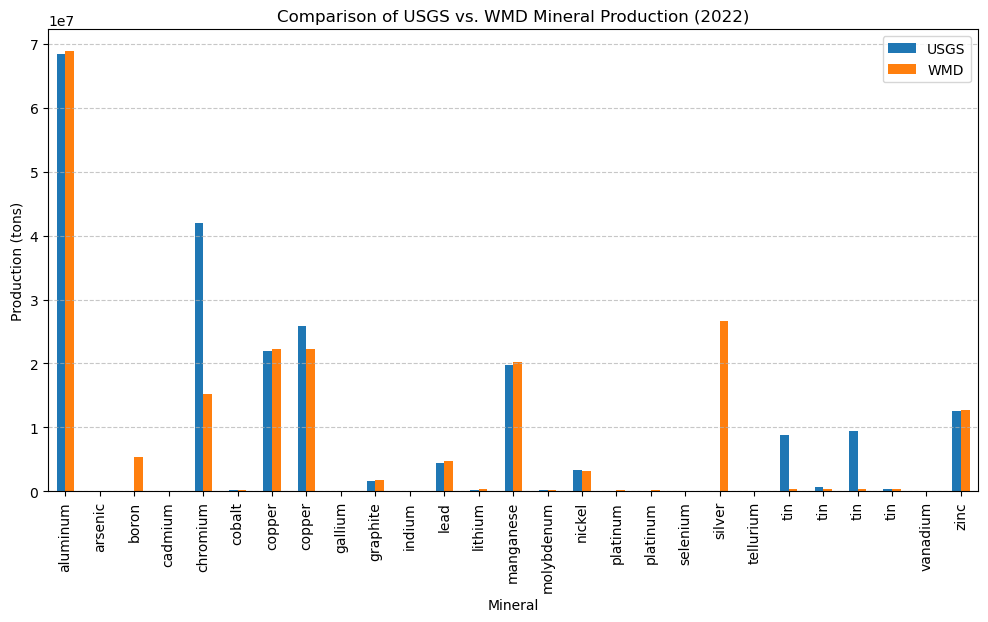

In [63]:
plt.figure(figsize=(12, 6))
df_comparison.plot(kind='bar', x='Mineral', y=['USGS_2022', 'WMD_2022'], figsize=(12, 6))
plt.ylabel("Production (tons)")
plt.title("Comparison of USGS vs. WMD Mineral Production (2022)")
plt.xticks(rotation=90)
plt.legend(["USGS", "WMD"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Dealing with missing metals

In [105]:
missing_metals = [
'dysprosium', # REE # Lundaev et al 2023?
'ferromanganese', # # Not in Penelope's study
'ferronickel',# # Not in Penelope's study
'iridium', # PGM # Not in Penelope's study
'neodymium', # REE
'praseodymium', # REE
'terbium' # REE 
]

For REEs, we will apply ratios based on the JRC (2020)

In [30]:
df_wmd_2024_rees = df_wmd_2024[df_wmd_2024['Commodity'] == 'rare earths']
df_wmd_2024_rees

,Commodity,Commodity_group,Unit,2018,2019,2020,2021,2022
48,rare earths,Non-Ferrous Metals,tons,182193,203365,229162,269003,296837
